In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython import display

In [0]:
tf.__version__

'2.0.0'

Load the MNIST dataset

In [0]:
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
print(train_images[1].shape)
print(len(train_images))
print(np.product(train_images[1].shape))
print(*train_images.shape)

(28, 28)
60000
784
60000 28 28


In [0]:
train_images = train_images.reshape(len(train_images),np.product(train_images[1].shape)).astype('float32')
test_images = test_images.reshape(len(test_images),np.product(test_images[0].shape)).astype('float32')

# Normalizing the images to the range of [0., 1.]
train_images /= 255.
test_images /= 255.

'''
# Binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.
'''

'\n# Binarization\ntrain_images[train_images >= .5] = 1.\ntrain_images[train_images < .5] = 0.\ntest_images[test_images >= .5] = 1.\ntest_images[test_images < .5] = 0.\n'

In [0]:
noise_factor = 0.5

noise_train = train_images + noise_factor * np.random.randn(*train_images.shape)
noise_test = test_images + noise_factor * np.random.randn(*test_images.shape)
# Clip the images to be between 0 and 1
noise_train = np.clip(noise_train, 0., 1.)
noise_test = np.clip(noise_test, 0., 1.)

creating model

In [0]:
input_image = tf.keras.layers.Input(shape = (784,))
encoded = tf.keras.layers.Dense(32, activation = 'relu')(input_image)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_image,decoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

In [0]:
%load_ext tensorboard
import datetime
import os

log_dir = os.path.join("logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [0]:
autoencoder.fit(noise_train, train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noise_test, test_images),
                callbacks=[tensorboard_callback]
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4325 - accuracy: 0.4822 - val_loss: 0.3605 - val_accuracy: 0.4976
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3432 - accuracy: 0.5012 - val_loss: 0.3368 - val_accuracy: 0.5001
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3303 - accuracy: 0.5025 - val_loss: 0.3296 - val_accuracy: 0.5001
Epoch 4/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3242 - accuracy: 0.5034 - val_loss: 0.3244 - val_accuracy: 0.5012
Epoch 5/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3198 - accuracy: 0.5041 - val_loss: 0.3205 - val_accuracy: 0.5020
Epoch 6/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3163 - accuracy: 0.5046 - val_loss: 0.3174 - val_accuracy: 0.5027
Epoch 7/50
60000/60000 [==============================] 

In [0]:
!pip uninstall grpcio

Uninstalling grpcio-1.15.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/grpc/*
    /usr/local/lib/python3.6/dist-packages/grpcio-1.15.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled grpcio-1.15.0


In [0]:
!pip install grpcio==1.24.3

     |████████████████████████████████| 2.2MB 39.1MB/s 


In [0]:

!kill 1050
%tensorboard --logdir logs/fit/

/bin/bash: line 0: kill: (1050) - No such process


VISUALIZING THE RECONSTRUCTED DATA AND BOTTLE NECK IMAGES

In [0]:
decoded_imgs = autoencoder.predict(noise_test)

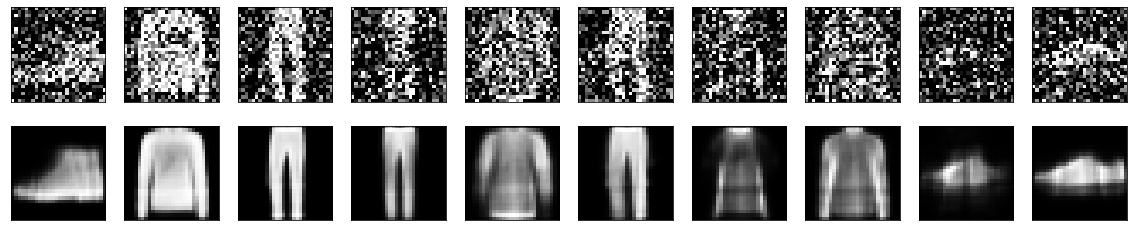

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()